# Data Cleaning
In this step I am going to see what the telecom data lookslike and do data cleaning to make the data ready for modeling and analysing

In [3]:
#importing necessary files and packages
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])

In [4]:
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, we need to explore what has been stored in it. How many data points,column names, number of columns,the number of null and non-null values etc. All these questions needs to be answered

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

# Handling Missing Values

In [4]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing_total(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 4), "%", "missing values.")

percent_missing_total(db)

The telecom dataset contains 12.5016 % missing values.


In [5]:
#Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### drop columns that have many missing values
here, I will drop columns which has missing values greater than 30%

In [6]:
# drop columns with more than 30% missing values
def drop_missing_columns(df):
    sub_columns=[]
    for x in df.columns:
        if df[str(x)].isna().sum()/df.shape[0]*100>30:
            sub_columns.append(str(x))
    df_clean= df.drop(columns=sub_columns)
    return df_clean

df_clean=drop_missing_columns(db)
df_clean.shape

(150001, 45)

In [7]:
#check null values after total droping of some columns
df_clean.isnull().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


Since Bearer_Id is a column that uniquely identifies datapoints in the datasets, 
I decided to drop the null values in this column

In [8]:
df_clean = df_clean[df_clean['Bearer Id'].notna()]
df_clean.isnull().sum() 

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  9
MSISDN/Number                       504
IMEI                                 11
Last Location Name                  162
Avg RTT DL (ms)                   27685
Avg RTT UL (ms)                   27666
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 716
50 Kbps < DL TP < 250 Kbps (%)      716
250 Kbps < DL TP < 1 Mbps (%)       716
DL TP > 1 Mbps (%)                  716
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [9]:
#check null values after droping of values(rows) in which Bearer ID is null
df_clean.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  9
MSISDN/Number                       504
IMEI                                 11
Last Location Name                  162
Avg RTT DL (ms)                   27685
Avg RTT UL (ms)                   27666
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 716
50 Kbps < DL TP < 250 Kbps (%)      716
250 Kbps < DL TP < 1 Mbps (%)       716
DL TP > 1 Mbps (%)                  716
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


Now we can start filling the missing values of the columns using approprate method(from forward fill, backward fill, mode, mean, meadian methods). Let's first check the data type and nature of the data(from the dataset) to know which method is appropriate for specific column

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149010 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           149010 non-null  object 
 2   Start ms                        149010 non-null  float64
 3   End                             149010 non-null  object 
 4   End ms                          149010 non-null  float64
 5   Dur. (ms)                       149010 non-null  float64
 6   IMSI                            149001 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148999 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 121325 non-null  float64
 11  Avg RTT UL (ms)                 121344 non-null  float64
 12  Avg Bearer TP DL

now I can fill the null values in the columns with non-numerical(object type) value using mode,forward fill or backward fill
I chose to use mode but forword fill and backward fill are also applicable

In [11]:
# fill missing with mode method for columns (Last Location Name, Handset Manufacturer, Handset Type)
def fix_filling_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]
df_clean['Last Location Name'] = fix_filling_mode(df_clean,'Last Location Name')
df_clean['Handset Manufacturer'] = fix_filling_mode(df_clean,'Handset Manufacturer')
df_clean['Handset Type']= fix_filling_mode(df_clean,'Handset Type')
df_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  9
MSISDN/Number                       504
IMEI                                 11
Last Location Name                    0
Avg RTT DL (ms)                   27685
Avg RTT UL (ms)                   27666
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 716
50 Kbps < DL TP < 250 Kbps (%)      716
250 Kbps < DL TP < 1 Mbps (%)       716
DL TP > 1 Mbps (%)                  716
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


For the columns with numerical values, we have to check for skewness before filling the missing values
and if they are skewed, we have to use median to fill the missing values

In [12]:
#check skewness using skew function
def check_skewness(df):
    sub_columns=[]
    skew_test=[]
    for x in df.columns:
        if df[str(x)].isna().sum()>0:
            sub_columns.append(str(x))
    skew_test=df[sub_columns].skew()
    print(skew_test)
check_skewness(df_clean)

IMSI                               40.987487
MSISDN/Number                     331.677128
IMEI                                1.070670
Avg RTT DL (ms)                    66.756066
Avg RTT UL (ms)                    28.499279
DL TP < 50 Kbps (%)                -2.298563
50 Kbps < DL TP < 250 Kbps (%)      3.273358
250 Kbps < DL TP < 1 Mbps (%)       4.571437
DL TP > 1 Mbps (%)                  5.361127
UL TP < 10 Kbps (%)                -8.985914
10 Kbps < UL TP < 50 Kbps (%)      10.946940
50 Kbps < UL TP < 300 Kbps (%)     21.833582
UL TP > 300 Kbps (%)               36.151871
Nb of sec with Vol DL < 6250B       9.024910
Nb of sec with Vol UL < 1250B       7.482728
dtype: float64


In [13]:
#The result of the skew_test from above showsdata is skewed. So we have to replace the null values with the median
sub_columns=[]
for x in df_clean.columns:
        if df_clean[str(x)].isna().sum()>0:
            sub_columns.append(str(x))
for x in sub_columns:
    df_clean[x]=df_clean[x].fillna(df_clean[x].mean())


In [14]:
#check for null values after filling
df_clean.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

# Task 1
Now, our data is cleaned and it's ready for more analysis and exploration. Let's find
### *let's start by finding top ten handsets used by the customers

In [15]:
#df_clean.groupby(['Handset Type']).size().nlargest(10)

In [16]:
#top ten handsets used by customers
df= df_clean.groupby(['Handset Type'])
df = df['MSISDN/Number'].nunique()
df = df.reset_index(name='Number_of_users')
df = df.sort_values(['Number_of_users'], ascending=False)
df.head(10)

,Handset Type,Number_of_users
315,Huawei B528S-23A,10617
53,Apple iPhone 6S (A1688),6745
1392,undefined,6651
49,Apple iPhone 6 (A1586),6246
59,Apple iPhone 7 (A1778),4676
73,Apple iPhone Se (A1723),3745
66,Apple iPhone 8 (A1905),3536
953,Samsung Galaxy S8 (Sm-G950F),3233
78,Apple iPhone Xr (A2105),3068
886,Samsung Galaxy J5 (Sm-J530),2742


### top three handset manufacturers used by customers

In [17]:
#df_clean.groupby(['Handset Manufacturer']).size().nlargest(3)

In [18]:
df=df_clean.groupby(['Handset Manufacturer'])['MSISDN/Number'].nunique().nlargest(3)
df

Handset Manufacturer
Apple      42479
Samsung    30648
Huawei     21629
Name: MSISDN/Number, dtype: int64

### top 5 handsets per top 3 handset manufacturer

In [19]:
# As we can see from the result above the top three handset manfucturers are Apple, Samsung, Huawei
def top5_handsets_per_top3_manu(df_clean,x):
    print(df_clean[df_clean['Handset Manufacturer']==x].groupby(['Handset Type'])['MSISDN/Number'].nunique().nlargest(5))


In [20]:
#top 5 Apple's product handsets used by customers
top5_handsets_per_top3_manu(df_clean, 'Apple')

Handset Type
Apple iPhone 6S (A1688)    6745
Apple iPhone 6 (A1586)     6246
Apple iPhone 7 (A1778)     4676
Apple iPhone Se (A1723)    3745
Apple iPhone 8 (A1905)     3536
Name: MSISDN/Number, dtype: int64


In [21]:
#top 5 Samsung's product handsets used by customers
top5_handsets_per_top3_manu(df_clean, 'Samsung')

Handset Type
Samsung Galaxy S8 (Sm-G950F)    3233
Samsung Galaxy J5 (Sm-J530)     2742
Samsung Galaxy A5 Sm-A520F      2702
Samsung Galaxy J3 (Sm-J330)     2583
Samsung Galaxy S7 (Sm-G930X)    2289
Name: MSISDN/Number, dtype: int64


In [22]:
#top 5 Huawei's product handsets used by customers
top5_handsets_per_top3_manu(df_clean, 'Huawei')

Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1527
Huawei E5180                       1183
Huawei P20                         1106
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64


# Task 1.1

In [23]:
#number_of_xDR_sessions
number_of_xDR_sessions = df_clean.groupby(['MSISDN/Number'])['Bearer Id'].count()
number_of_xDR_sessions.head(10)

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
3.360101e+10    2
3.360101e+10    2
3.360101e+10    1
3.360101e+10    2
3.360102e+10    1
Name: Bearer Id, dtype: int64

In [24]:
#Session duration
session_duration = df_clean.groupby(['MSISDN/Number'])['Dur. (ms)'].sum()
session_duration.head()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
Name: Dur. (ms), dtype: float64

In [25]:
# the total download (DL) and upload (UL) data
total_DL_UL = df_clean.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


In [26]:
# the total data volume (in Bytes) during this session for each application
total_data_volume = df_clean.groupby(['MSISDN/Number'])[['Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                        'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                        'Other DL (Bytes)', 'Other UL (Bytes)','Total UL (Bytes)', 'Total DL (Bytes)']].sum()
total_data_volume.head(5)

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


### Task 1.2
### Exploratory data analysis

In [96]:
#Analyzing mean, median, min, max metrics
total_data_volume = df_clean.groupby(['MSISDN/Number'])[['Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                        'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                        'Other DL (Bytes)', 'Other UL (Bytes)','Total UL (Bytes)', 'Total DL (Bytes)']]
total_data_volume.agg(['mean','median','min','max']).head()

Social Media DL (Bytes)                                   \
                                 mean     median        min        max   
MSISDN/Number                                                            
3.360100e+10                2206504.0  2206504.0  2206504.0  2206504.0   
3.360100e+10                2598548.0  2598548.0  2598548.0  2598548.0   
3.360100e+10                3148004.0  3148004.0  3148004.0  3148004.0   
3.360101e+10                 251469.0   251469.0   251469.0   251469.0   
3.360101e+10                1430615.0  1430615.0  1359904.0  1501326.0   

              Social Media UL (Bytes)                             \
                                 mean   median      min      max   
MSISDN/Number                                                      
3.360100e+10                  25631.0  25631.0  25631.0  25631.0   
3.360100e+10                  62017.0  62017.0  62017.0  62017.0   
3.360100e+10                  47619.0  47619.0  47619.0  47619.0   
3.360101e+10                  28825.0  28825.0  28825.0  28825.0   
3.360101e+10                  25656.0  25656.0  22731.0  28581.0   

              Google DL (Bytes)                                   \
                           mean     median        min        max   
MSISDN/Number                                                      
3.360100e+10          3337123.0  3337123.0  3337123.0  3337123.0   
3.360100e+10          4197697.0  4197697.0  4197697.0  4197697.0   
3.360100e+10          3343483.0  3343483.0  3343483.0  3343483.0   
3.360101e+10          5937765.0  5937765.0  5937765.0  5937765.0   
3.360101e+10          6864334.0  6864334.0  6309062.0  7419606.0   

              Google UL (Bytes)                                   \
                           mean     median        min        max   
MSISDN/Number                                                      
3.360100e+10          1051882.0  1051882.0  1051882.0  1051882.0   
3.360100e+10          1137166.0  1137166.0  1137166.0  1137166.0   
3.360100e+10            99643.0    99643.0    99643.0    99643.0   
3.360101e+10          3740728.0  3740728.0  3740728.0  3740728.0   
3.360101e+10          2385474.0  2385474.0  2019919.0  2751029.0   

              Email DL (Bytes)                                   \
                          mean     median        min        max   
MSISDN/Number                                                     
3.360100e+10          837400.0   837400.0   837400.0   837400.0   
3.360100e+10         2828821.0  2828821.0  2828821.0  2828821.0   
3.360100e+10         2436500.0  2436500.0  2436500.0  2436500.0   
3.360101e+10         2178618.0  2178618.0  2178618.0  2178618.0   
3.360101e+10         1123904.0  1123904.0   979859.0  1267949.0   

              Email UL (Bytes)                                \
                          mean    median       min       max   
MSISDN/Number                                                  
3.360100e+10          493962.0  493962.0  493962.0  493962.0   
3.360100e+10          478960.0  478960.0  478960.0  478960.0   
3.360100e+10          768880.0  768880.0  768880.0  768880.0   
3.360101e+10          106052.0  106052.0  106052.0  106052.0   
3.360101e+10          528830.5  528830.5  145736.0  911925.0   

              Youtube DL (Bytes)                                      \
                            mean      median         min         max   
MSISDN/Number                                                          
3.360100e+10          14900201.0  14900201.0  14900201.0  14900201.0   
3.360100e+10           5324251.0   5324251.0   5324251.0   5324251.0   
3.360100e+10           2137272.0   2137272.0   2137272.0   2137272.0   
3.360101e+10           4393123.0   4393123.0   4393123.0   4393123.0   
3.360101e+10           5169985.5   5169985.5   2312338.0   8027633.0   

              Youtube UL (Bytes)                                      \
                            mean      median         min         max   
MSISDN/Number  

### Univariate Analysis

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [29]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.00000,5.000000,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.00000,5.000000,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,106.10246,17.663263,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,106.10246,17.663263,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,106.10246,17.663263,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [30]:
def total_data_usage(df,ul,dl):
    return df[ul]+df[dl]
df=df_clean[['MSISDN/Number','Bearer Id','Dur. (ms)']]
df['Social_Media_UL_Dl']=total_data_usage(df_clean,'Social Media UL (Bytes)','Social Media DL (Bytes)')
df['Google_Bytes_UL_Dl']=total_data_usage(df_clean,'Google UL (Bytes)','Google DL (Bytes)')
df['Email_Bytes_UL_Dl']=total_data_usage(df_clean,'Email UL (Bytes)','Email DL (Bytes)')
df['Youtube_Bytes_UL_Dl']=total_data_usage(df_clean,'Youtube UL (Bytes)','Youtube DL (Bytes)')
df['Netflix_Bytes_UL_Dl']=total_data_usage(df_clean,'Netflix UL (Bytes)','Netflix DL (Bytes)')
df['Gaming_Bytes_UL_Dl']=total_data_usage(df_clean,'Gaming UL (Bytes)','Gaming DL (Bytes)')
df['Other_Bytes_UL_Dl']=total_data_usage(df_clean,'Other UL (Bytes)','Other DL (Bytes)')
df['Total_Bytes_UL_Dl']=total_data_usage(df_clean,'Total UL (Bytes)','Total DL (Bytes)')
df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
0,3.366496e+10,1.311448e+19,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,1.311448e+19,1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,1.311448e+19,1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,1.311448e+19,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,1.311448e+19,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [31]:
#fix outliers
columns = df.columns.to_list()
columns.remove('MSISDN/Number')
for i in columns:
    df[i] = np.where(df[i] > df[i].quantile(0.95), df[i].median(),df[i])

In [32]:
def uivariate_plot(col,title):
    plt.figure(figsize=(16,8))
    plt.subplot(2, 2, 1)
    plt.hist(col, bins=20,color='#AEC6DF',edgecolor='#FDE6B4',linewidth=0.5)
    plt.title(title,size=14)
    
    plt.subplot(2, 2, 2)
    plt.boxplot(col)
    plt.title(title,size=14)


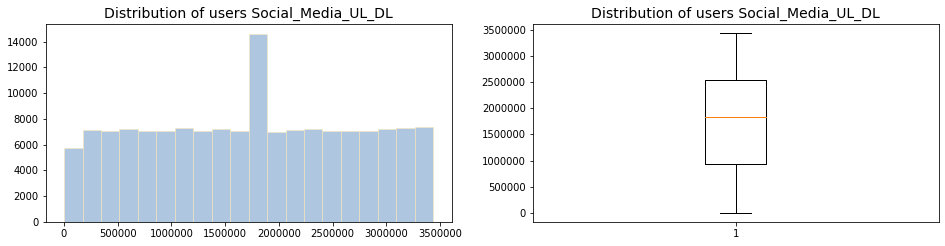

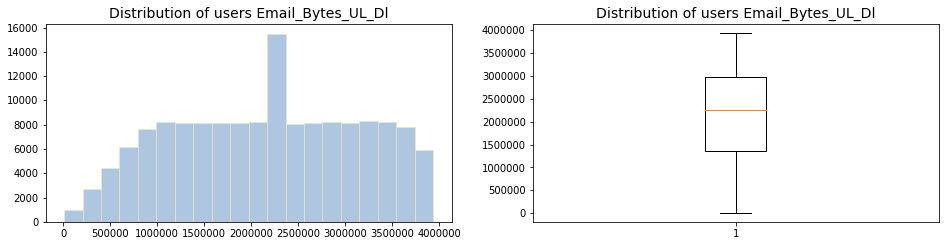

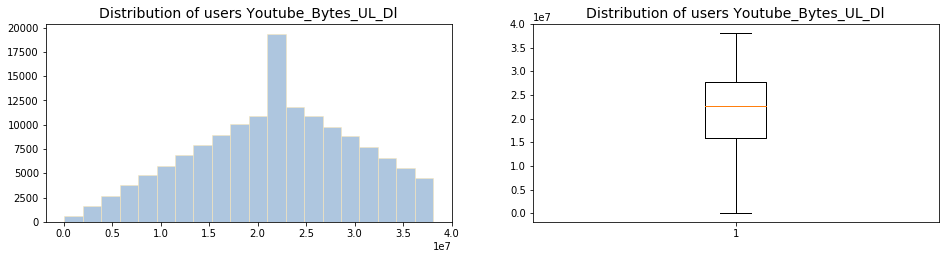

In [33]:
uivariate_plot(df['Social_Media_UL_Dl'],'Distribution of users Social_Media_UL_DL')
uivariate_plot(df['Email_Bytes_UL_Dl'],'Distribution of users Email_Bytes_UL_Dl')
uivariate_plot(df['Youtube_Bytes_UL_Dl'],'Distribution of users Youtube_Bytes_UL_Dl')


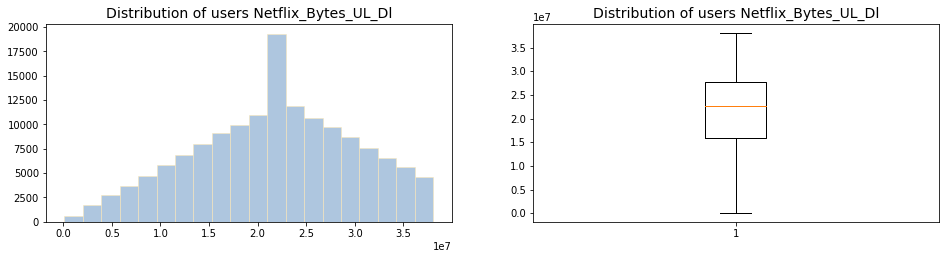

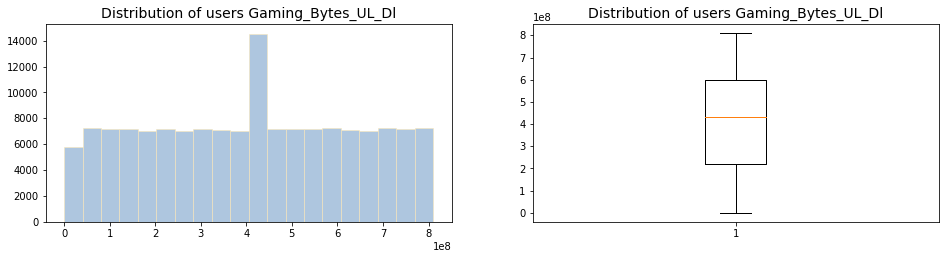

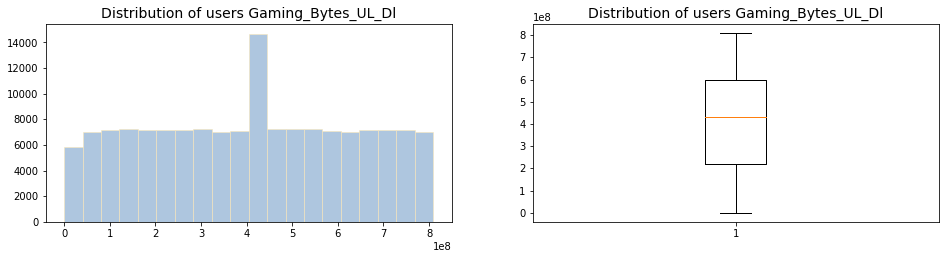

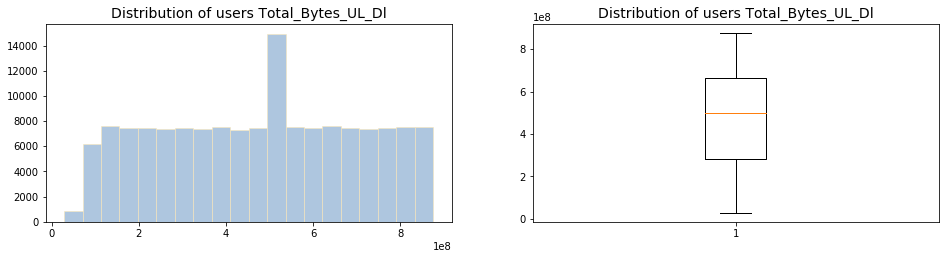

In [34]:
uivariate_plot(df['Netflix_Bytes_UL_Dl'],'Distribution of users Netflix_Bytes_UL_Dl')
uivariate_plot(df['Gaming_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df['Other_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df['Total_Bytes_UL_Dl'],'Distribution of users Total_Bytes_UL_Dl')

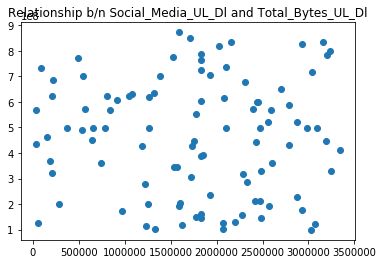

In [35]:
def bivariate_plot(df,col,title):
    plt.scatter(df[col],df['Total_Bytes_UL_Dl'],)
    plt.title(title)
bivariate_plot(df.head(100),'Social_Media_UL_Dl','Relationship b/n Social_Media_UL_Dl and Total_Bytes_UL_Dl')

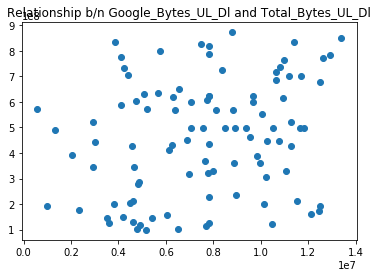

In [36]:
bivariate_plot(df.head(100),'Google_Bytes_UL_Dl','Relationship b/n Google_Bytes_UL_Dl and Total_Bytes_UL_Dl')


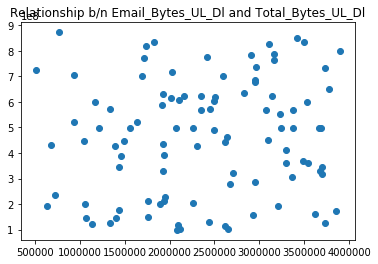

In [37]:
bivariate_plot(df.head(100),'Email_Bytes_UL_Dl','Relationship b/n Email_Bytes_UL_Dl and Total_Bytes_UL_Dl')


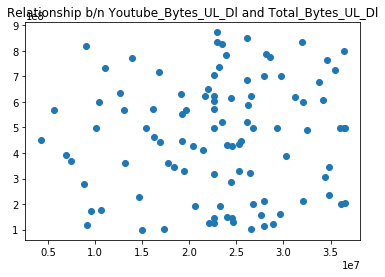

In [38]:
bivariate_plot(df.head(100),'Youtube_Bytes_UL_Dl','Relationship b/n Youtube_Bytes_UL_Dl and Total_Bytes_UL_Dl')


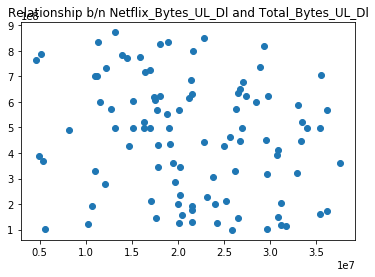

In [39]:
bivariate_plot(df.head(100),'Netflix_Bytes_UL_Dl','Relationship b/n Netflix_Bytes_UL_Dl and Total_Bytes_UL_Dl')


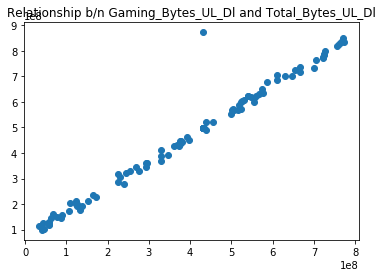

In [40]:
bivariate_plot(df.head(100),'Gaming_Bytes_UL_Dl','Relationship b/n Gaming_Bytes_UL_Dl and Total_Bytes_UL_Dl')

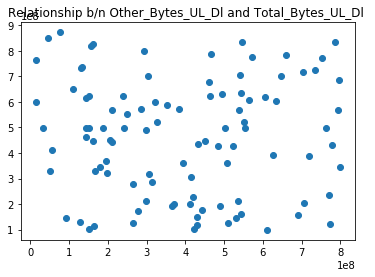

In [41]:
bivariate_plot(df.head(100),'Other_Bytes_UL_Dl','Relationship b/n Other_Bytes_UL_Dl and Total_Bytes_UL_Dl ')

In [42]:
df.drop(columns=['Total_Bytes_UL_Dl'], inplace=True)

In [43]:
df.corr()

,MSISDN/Number,Bearer Id,Dur. (ms),Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl
MSISDN/Number,1.000000,-0.002991,-0.000391,-0.001682,0.001986,0.003955,0.001926,0.003100,-0.003533,-0.001152
Bearer Id,-0.002991,1.000000,-0.067298,0.001134,-0.002135,0.001403,-0.002033,-0.000712,-0.000923,0.002445
Dur. (ms),-0.000391,-0.067298,1.000000,-0.002095,-0.002338,0.001361,0.002431,-0.005441,0.004449,-0.000996
Social_Media_UL_Dl,-0.001682,0.001134,-0.002095,1.000000,-0.002002,0.004131,0.000179,0.001360,-0.000448,0.006460
Google_Bytes_UL_Dl,0.001986,-0.002135,-0.002338,-0.002002,1.000000,0.000451,0.000934,-0.001756,-0.001281,-0.000983
Email_Bytes_UL_Dl,0.003955,0.001403,0.001361,0.004131,0.000451,1.000000,-0.002378,0.000855,0.001408,-0.002046
Youtube_Bytes_UL_Dl,0.001926,-0.002033,0.002431,0.000179,0.000934,-0.002378,1.000000,0.000305,-0.005077,0.004804
Netflix_Bytes_UL_Dl,0.003100,-0.000712,-0.005441,0.001360,-0.001756,0.000855,0.000305,1.000000,-0.003410,-0.008311
Gaming_Bytes_UL_Dl,-0.003533,-0.000923,0.004449,-0.000448,-0.001281,0.001408,-0.005077,-0.003410,1.000000,0.000181
Other_Bytes_UL_Dl,-0.001152,0.002445,-0.000996,0.006460,-0.000983,-0.002046,0.004804,-0.008311,0.000181,1.000000


### Principal Component Analysis

In [44]:
from sklearn.preprocessing import StandardScaler
columns = ['Social_Media_UL_Dl', 'Google_Bytes_UL_Dl', 'Email_Bytes_UL_Dl', 'Youtube_Bytes_UL_Dl','Netflix_Bytes_UL_Dl', 'Gaming_Bytes_UL_Dl', 'Other_Bytes_UL_Dl']
df[columns]=StandardScaler().fit_transform(df[columns])
df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl
0,3.366496e+10,1.311448e+19,86399.0,-0.180107,-1.431838,1.565305,-0.409770,-0.467642,-0.521798,-1.016123
1,3.368185e+10,1.311448e+19,86399.0,0.198317,-0.961038,-1.252076,0.109649,1.666635,0.882360,0.588782
2,3.376063e+10,1.311448e+19,86399.0,-0.017424,0.854199,1.220584,1.529385,0.242887,-0.797974,0.024575
3,3.375034e+10,1.311448e+19,86399.0,-1.131336,1.348242,-0.096551,1.783952,-0.800563,0.094081,1.565215
4,3.369980e+10,1.311448e+19,86399.0,-0.865261,0.079948,-0.056424,1.504890,-0.505650,0.534371,0.689413


In [45]:
from sklearn.decomposition import PCA
pca = PCA()
transform=pca.fit_transform(df)
transform=pd.DataFrame(transform)
transform.head()

,0,1,2,3,4,5,6,7,8,9
0,3.263895e+18,8.264316e+07,-1849.328605,-0.866992,0.761452,-0.810252,0.238335,-1.397178,1.378166,0.564660
1,3.263895e+18,9.953539e+07,-1849.328380,-0.135241,-0.193709,-0.441368,1.800042,0.673176,-1.343288,-0.835103
2,3.263895e+18,1.783081e+08,-1849.327449,0.258772,-1.093328,-0.768629,-1.470640,-1.083576,-0.261474,-0.051064
3,3.263895e+18,1.680242e+08,-1849.327569,1.751244,-1.149002,1.315768,-1.091555,-0.942392,-0.734756,-0.812465
4,3.263895e+18,1.174770e+08,-1849.328149,0.971511,-0.566078,0.804302,-0.001292,-1.221791,-0.765312,-0.238306


# Task 2 - User Engagement analysis


In [80]:
def total_data_usage(df,ul,dl):
    return df[ul]+df[dl]
dataset=df_clean[['MSISDN/Number','Bearer Id','Dur. (ms)']]
dataset['Social_Media_UL_Dl']=total_data_usage(df_clean,'Social Media UL (Bytes)','Social Media DL (Bytes)')
dataset['Google_Bytes_UL_Dl']=total_data_usage(df_clean,'Google UL (Bytes)','Google DL (Bytes)')
dataset['Email_Bytes_UL_Dl']=total_data_usage(df_clean,'Email UL (Bytes)','Email DL (Bytes)')
dataset['Youtube_Bytes_UL_Dl']=total_data_usage(df_clean,'Youtube UL (Bytes)','Youtube DL (Bytes)')
dataset['Netflix_Bytes_UL_Dl']=total_data_usage(df_clean,'Netflix UL (Bytes)','Netflix DL (Bytes)')
dataset['Gaming_Bytes_UL_Dl']=total_data_usage(df_clean,'Gaming UL (Bytes)','Gaming DL (Bytes)')
dataset['Other_Bytes_UL_Dl']=total_data_usage(df_clean,'Other UL (Bytes)','Other DL (Bytes)')
dataset['Total_Bytes_UL_Dl']=total_data_usage(df_clean,'Total UL (Bytes)','Total DL (Bytes)')
dataset.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
0,3.366496e+10,1.311448e+19,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,1.311448e+19,1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,1.311448e+19,1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,1.311448e+19,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,1.311448e+19,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [81]:
dataset=dataset.groupby(['MSISDN/Number']).agg({'Bearer Id':'count', 'Dur. (ms)':'sum', 'Total_Bytes_UL_Dl':'sum'}).reset_index()

dataset.rename(columns={'Bearer Id':'sessions frequency'},inplace=True)
#dataset.sample()
dataset.head() 

,MSISDN/Number,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09


In [88]:
#top 10 customers per sessions frequency
dataset.sort_values(['sessions frequency'], ascending=False).head(10)


,MSISDN/Number,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl
106468,4.190654e+10,504,35399200.0,2.540524e+11
13467,3.362632e+10,18,8791927.0,7.971167e+09
13123,3.362578e+10,17,18553754.0,8.499621e+09
6404,3.361489e+10,17,9966898.0,8.846226e+09
36909,3.365973e+10,16,4035428.0,7.705863e+09
...,...,...,...,...
14413,3.362782e+10,1,17370.0,8.094226e+08
15480,3.362985e+10,1,17368.0,6.771113e+08
276,3.360174e+10,1,17357.0,8.681439e+08
21082,3.364600e+10,1,17356.0,8.112672e+08


In [91]:
#top 10 customers per session duration 
dataset.sort_values(['Dur. (ms)'], ascending=False).head(10)


,MSISDN/Number,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl
106468,4.190654e+10,504,35399200.0,2.540524e+11
13123,3.362578e+10,17,18553754.0,8.499621e+09
6404,3.361489e+10,17,9966898.0,8.846226e+09
92584,3.376054e+10,15,9279434.0,8.514774e+09
13467,3.362632e+10,18,8791927.0,7.971167e+09
64883,3.366716e+10,13,8744914.0,5.618394e+09
50096,3.366284e+10,9,6614270.0,4.000098e+09
56951,3.366469e+10,9,6288730.0,5.682007e+09
658,3.360313e+10,12,6287761.0,4.976195e+09
65787,3.366746e+10,6,5649882.0,2.600522e+09


In [93]:
#top 10 customers per sessions total traffic (download and upload (bytes))
dataset.sort_values(['Total_Bytes_UL_Dl'], ascending=False).head(10)


,MSISDN/Number,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl
106468,4.190654e+10,504,35399200.0,2.540524e+11
6404,3.361489e+10,17,9966898.0,8.846226e+09
92584,3.376054e+10,15,9279434.0,8.514774e+09
13123,3.362578e+10,17,18553754.0,8.499621e+09
13467,3.362632e+10,18,8791927.0,7.971167e+09
76077,3.367588e+10,15,4865947.0,7.891111e+09
36909,3.365973e+10,16,4035428.0,7.705863e+09
62804,3.366646e+10,11,4536757.0,7.308501e+09
92239,3.376041e+10,12,5321667.0,7.132371e+09
57032,3.366471e+10,11,2927785.0,6.872018e+09


# K-Means Clustering¶

In [102]:
engagement_metrics=dataset[['sessions frequency','Dur. (ms)','Total_Bytes_UL_Dl']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(engagement_metrics)
normalized_metrics=pd.DataFrame(scaled_metrics)

In [2]:
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
new_db=